In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%cd "/content/drive/MyDrive/Krayen/Garbage Classification"

/content/drive/MyDrive/Krayen/Garbage Classification


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Krayen/Garbage Classification/garbage classification/Garbage classification",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 2527 images belonging to 6 classes.


In [ ]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 6, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/28
79/79 [==============================] - 60s 598ms/step - loss: 1.5443 - accuracy: 0.4076
Epoch 2/28
79/79 [==============================] - 47s 595ms/step - loss: 1.2599 - accuracy: 0.5184
Epoch 3/28
79/79 [==============================] - 44s 559ms/step - loss: 1.1820 - accuracy: 0.5528
Epoch 4/28
79/79 [==============================] - 44s 556ms/step - loss: 1.0998 - accuracy: 0.5869
Epoch 5/28
79/79 [==============================] - 44s 558ms/step - loss: 1.0324 - accuracy: 0.6051
Epoch 6/28
79/79 [==============================] - 45s 574ms/step - loss: 0.9819 - accuracy: 0.6347
Epoch 7/28
79/79 [==============================] - 44s 557ms/step - loss: 0.9189 - accuracy: 0.6557
Epoch 8/28
79/79 [==============================] - 44s 552ms/step - loss: 0.8800 - accuracy: 0.6818
Epoch 9/28
79/79 [==============================] - 43s 548ms/step - loss: 0.8691 - accuracy: 0.6795
Epoch 10/28
79/79 [==============================] - 45s 562ms/step - loss: 0.8246 - accura

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

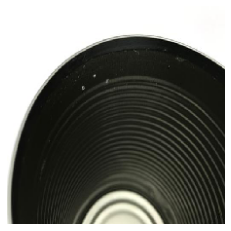

Your waste material is  metal  with  99.99  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Krayen/Garbage Classification/garbage classification/Garbage classification/metal/metal108.jpg")

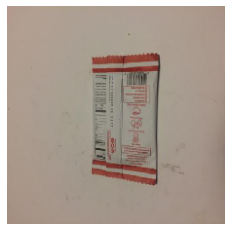

Your waste material is  trash  with  98.77  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Krayen/Garbage Classification/garbage classification/Garbage classification/trash/trash123.jpg")

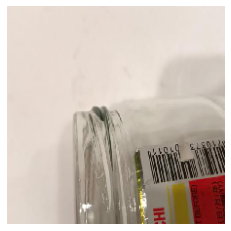

Your waste material is  glass  with  91.32  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Krayen/Garbage Classification/garbage classification/Garbage classification/glass/glass134.jpg")

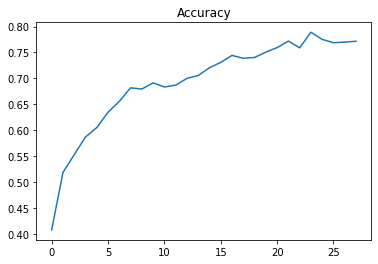

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

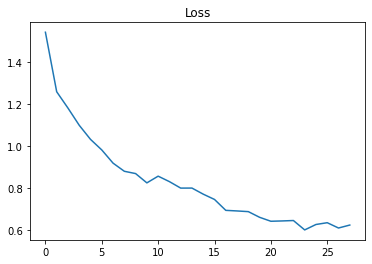

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [ ]:
model.save("classifyWaste.h5")

In [ ]:
#================================================================================================================